In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import functions as f 

%matplotlib inline





In [2]:
df = pd.read_pickle('data/rent_clustering_done.pkl')

In [3]:
df.head()

,obid,mietekalt,nebenkosten,heizkosten,baujahr,letzte_modernisierung,wohnflaeche,nutzflaeche,etage,anzahletagen,...,kombinierte Fossilkraftstoffe,Gas,Holz,Heizdampf-Fernwärme,thermische Umweltenergie,Flüssiggas,kombinierte Bio Energie,Elektro,year,label
0,18948200,390.0,140.0,NaN,1994.0,NaN,64.0,NaN,2.0,4.0,...,0,0,0,0,0,0,0,0,2007,very low priced
1,18948200,415.0,140.0,NaN,1994.0,NaN,65.0,NaN,2.0,4.0,...,0,0,0,0,0,0,0,0,2008,low priced
2,18948200,480.0,140.0,NaN,1994.0,NaN,68.0,NaN,2.0,4.0,...,0,0,0,0,0,0,0,0,2008,low priced
3,18948200,480.0,140.0,NaN,1994.0,NaN,68.0,NaN,2.0,4.0,...,0,0,0,0,0,0,0,0,2009,low priced
4,18948200,390.0,140.0,NaN,1994.0,NaN,68.0,NaN,2.0,4.0,...,0,0,0,0,0,0,0,0,2009,very low priced


In [5]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651885 entries, 0 to 2651884
Data columns (total 74 columns):
 #   Column                            Non-Null Count    Dtype         
---  ------                            --------------    -----         
 0   obid                              2651885 non-null  int64         
 1   mietekalt                         2651885 non-null  float64       
 2   nebenkosten                       2490467 non-null  float64       
 3   heizkosten                        824489 non-null   float64       
 4   baujahr                           2651885 non-null  float64       
 5   letzte_modernisierung             556602 non-null   float64       
 6   wohnflaeche                       2651885 non-null  float64       
 7   nutzflaeche                       630468 non-null   float64       
 8   etage                             2651885 non-null  float64       
 9   anzahletagen                      2651885 non-null  float64       
 10  zimmeranzahl      

In [6]:

df.columns.values

array(['obid', 'mietekalt', 'nebenkosten', 'heizkosten', 'baujahr',
       'letzte_modernisierung', 'wohnflaeche', 'nutzflaeche', 'etage',
       'anzahletagen', 'zimmeranzahl', 'schlafzimmer', 'badezimmer',
       'ev_kennwert', 'laufzeittage', 'hits', 'click_schnellkontakte',
       'click_customer', 'click_weitersagen', 'click_url', 'aufzug',
       'balkon', 'einbaukueche', 'ev_wwenthalten', 'foerderung',
       'gaestewc', 'garten', 'heizkosten_in_wm_enthalten', 'keller',
       'parkplatz', 'rollstuhlgerecht', 'ausstattung',
       'energieeffizienzklasse', 'energieausweistyp', 'haustier_erlaubt',
       'heizungsart', 'kategorie_Wohnung', 'objektzustand', 'kid2019',
       'ags2019', 'anbieter', 'spell', 'adat', 'edat', 'rent_sqm', 'City',
       'Wärmezufuhr', 'Erdgas leicht', 'Erdgas schwer',
       'keine Information', 'Windenergie', 'Pellets', 'Solarenergie',
       'Koks', 'kombinierte erneuerbare Energie', 'Erdwärme',
       'Bioenergie', 'Wasserenergie', 'Nahwärme', 'Fern

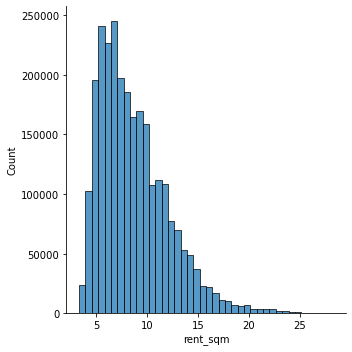

In [7]:
sns.displot(data=df, x='rent_sqm', bins=40)



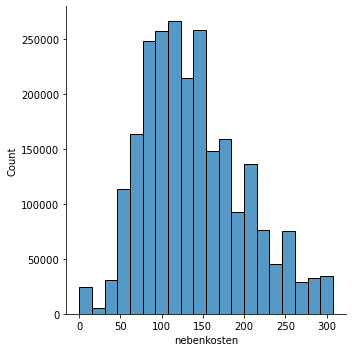

In [8]:
sns.displot(data=f.remove_outlier(df, ['nebenkosten']), x='nebenkosten', bins=20)



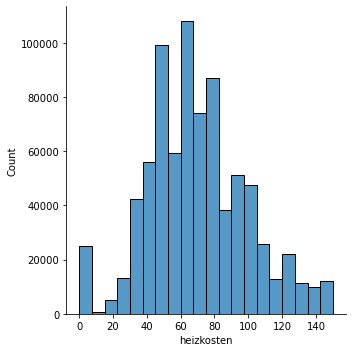

In [26]:
f.remove_outlier(df, ['heizkosten'])
sns.displot(data=f.remove_outlier(df, ['heizkosten']), x='heizkosten', bins=20)



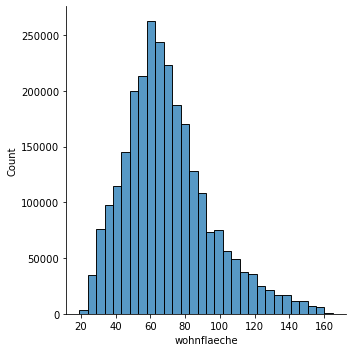

In [9]:
sns.displot(data=df, x='wohnflaeche', bins=30)

### Mean rent_sqm over time

In [14]:
mean_rent_sqm = df.groupby(['year', 'City', 'label']).rent_sqm.mean().reset_index(name='mean_rent_sqm')

In [15]:
mean_rent_sqm

,year,City,label,mean_rent_sqm
0,2007,Berlin,high priced,8.611152
1,2007,Berlin,low priced,6.023987
2,2007,Berlin,normal priced,7.138539
3,2007,Berlin,very high priced,10.404585
4,2007,Berlin,very low priced,5.246541
...,...,...,...,...
965,2019,Stuttgart,high priced,15.349910
966,2019,Stuttgart,low priced,15.063898
967,2019,Stuttgart,normal priced,14.899830
968,2019,Stuttgart,very high priced,19.020424


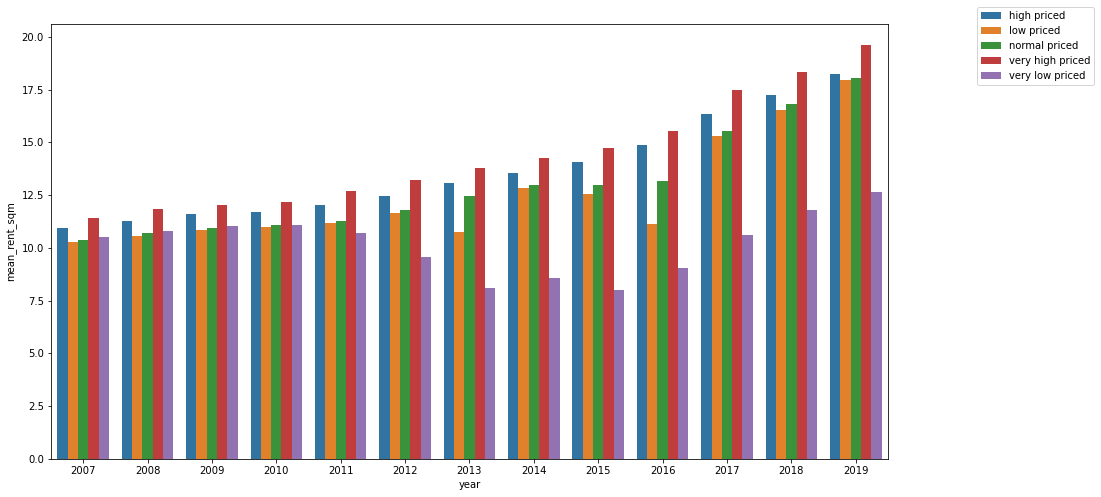

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(data=mean_rent_sqm.query('City == "München" '), x='year', y='mean_rent_sqm', hue='label')
plt.legend(labels= ['very high priced', 'high priced', 'normal priced', 'low priced', 'very low priced'])
           

plt.legend(bbox_to_anchor=(1.1, 1.05))

### How is the procentual change from 2007 to 2019

In [27]:
years = mean_rent_sqm.year.unique()

years

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019])

In [33]:
mean_rent_sqm

,year,City,label,mean_rent_sqm
0,2007,Berlin,high priced,8.611152
1,2007,Berlin,low priced,6.023987
2,2007,Berlin,normal priced,7.138539
3,2007,Berlin,very high priced,10.404585
4,2007,Berlin,very low priced,5.246541
...,...,...,...,...
965,2019,Stuttgart,high priced,15.349910
966,2019,Stuttgart,low priced,15.063898
967,2019,Stuttgart,normal priced,14.899830
968,2019,Stuttgart,very high priced,19.020424


In [34]:
mean_rent_sqm_pivot = mean_rent_sqm.query('label == "very high priced"').pivot(index='City', columns='year', values='mean_rent_sqm')


In [35]:
mean_rent_sqm_pivot

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
City,,,,,,,,,,,,,
Berlin,10.404585,10.632235,10.699227,10.686592,10.895204,11.396160,11.747126,12.158657,12.401242,12.996645,14.180234,15.032284,15.968334
Bremen,9.266297,10.426682,10.014451,10.464579,10.670044,10.836801,11.523572,11.401679,11.905616,11.963048,11.746341,12.245901,12.122174
Dortmund,NaN,10.565949,10.244238,11.290356,10.807381,10.530699,11.515165,10.772599,11.244794,11.638647,12.933810,11.285063,11.738046
Dresden,9.480501,11.113501,11.232376,9.301165,9.923086,10.124258,10.037266,10.082690,10.507159,11.451801,11.382784,11.868892,12.416922
Duisburg,10.359968,NaN,8.723077,10.396474,9.267319,8.904110,NaN,NaN,10.261579,10.943369,10.061225,12.196510,11.640665
Düsseldorf,10.768284,10.988425,11.430579,11.411942,11.543845,12.042237,11.940207,12.149243,12.528091,12.605584,13.463639,13.805057,14.160253
Essen,10.091945,10.350633,10.936843,10.024326,10.270726,10.485976,12.144505,10.702380,10.983086,11.192372,11.349449,11.321472,11.660740
Frankfurt,11.222984,11.273976,11.845150,11.840264,12.354798,12.694050,13.054389,13.445879,14.052822,14.272455,15.249202,16.215467,16.889511
Hamburg,11.054840,11.350389,11.783209,11.862166,12.330715,12.696136,13.068591,13.453924,13.626169,14.052705,14.905737,15.412606,15.827524


In [36]:
changes = {}
for i in range(2008, 2020):
    print(i)
    changes[i] = mean_rent_sqm_pivot.loc[:,i] / mean_rent_sqm_pivot.loc[:,2007] * 100 - 100
changes = pd.DataFrame(changes)

2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [38]:
changes

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
City,,,,,,,,,,,,
Berlin,2.187975,2.831840,2.710411,4.715407,9.530165,12.903358,16.858642,19.190163,24.912665,36.288316,44.477493,53.474003
Bremen,12.522641,8.073926,12.931618,15.148961,16.948566,24.360055,23.044619,28.482997,29.102793,26.764141,32.155290,30.820055
Dortmund,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dresden,17.224833,18.478717,-1.891626,4.668369,6.790327,5.872741,6.351869,10.829149,20.793207,20.065221,25.192668,30.973271
Duisburg,NaN,-15.800158,0.352373,-10.546840,-14.052727,NaN,NaN,-0.949706,5.631304,-2.883632,17.727294,12.361981
Düsseldorf,2.044351,6.150427,5.977348,7.202274,11.830609,10.883100,12.824317,16.342499,17.062144,25.030497,28.201090,31.499631
Essen,2.563316,8.372004,-0.670028,1.771519,3.904415,20.338597,6.048738,8.830224,10.904009,12.460472,12.183255,15.545017
Frankfurt,0.454360,5.543679,5.500146,10.084791,13.107623,16.318347,19.806632,25.214674,27.171669,35.874758,44.484457,50.490388
Hamburg,2.673485,6.588689,7.302923,11.541326,14.846861,18.216020,21.701665,23.259761,27.118127,34.834493,39.419537,43.172804


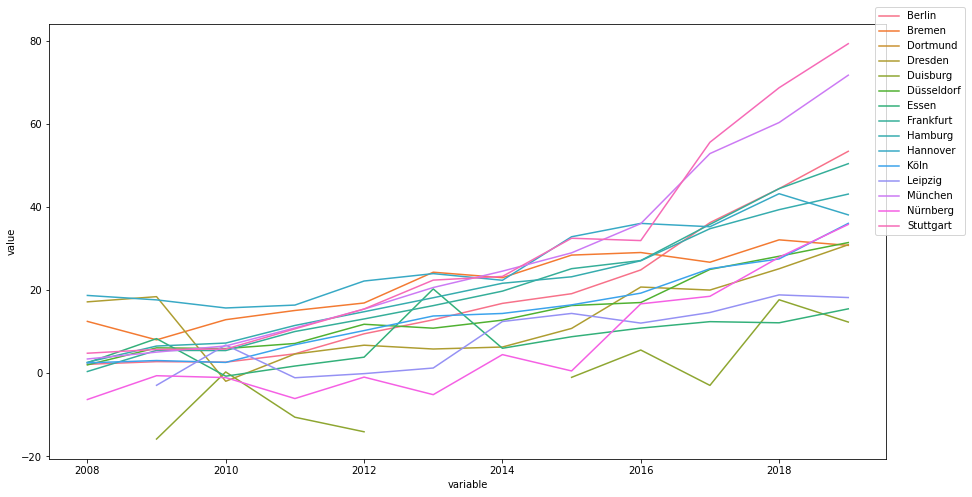

In [37]:
plt.figure(figsize=(15,8))
sns.lineplot(data=pd.melt(changes.reset_index(), id_vars='City'), x='variable', y='value', hue='City')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [177]:
pd.melt(changes.reset_index(), id_vars='City')

,City,variable,value
0,Berlin,2008,3.024677
1,Bremen,2008,2.291093
2,Dortmund,2008,0.995874
3,Dresden,2008,2.002802
4,Duisburg,2008,-0.238034
...,...,...,...
175,Köln,2019,51.779747
176,Leipzig,2019,57.507064
177,München,2019,79.062079
178,Nürnberg,2019,76.758146


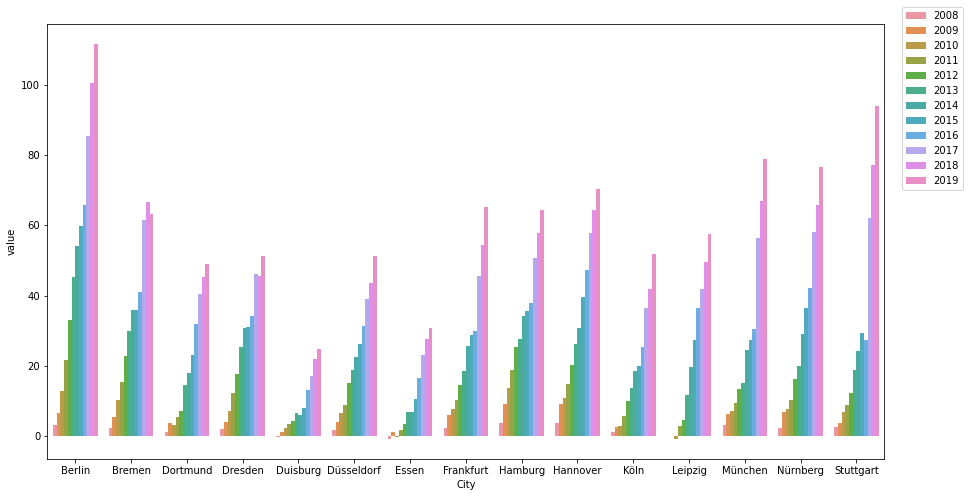

In [179]:
plt.figure(figsize=(15,8))
sns.barplot(data=pd.melt(changes.reset_index(), id_vars='City'), x='City', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.1, 1.05))


In [181]:
mean_rent_sqm_pivot

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
City,,,,,,,,,,,,,
Berlin,5.699893,5.872297,6.073253,6.435632,6.937987,7.579885,8.281475,8.786195,9.103260,9.454485,10.575010,11.430242,12.071944
Bremen,5.417372,5.541490,5.716377,5.973700,6.246351,6.645342,7.033250,7.357091,7.359849,7.638878,8.757778,9.022479,8.837348
Dortmund,5.181137,5.232735,5.367633,5.345259,5.458624,5.551120,5.926882,6.111660,6.378853,6.839773,7.281613,7.528232,7.725058
Dresden,5.566383,5.677866,5.794650,5.955757,6.246358,6.557525,6.972751,7.282071,7.298977,7.464653,8.129369,8.104804,8.424403
Duisburg,5.041223,5.029224,5.101741,5.157355,5.213594,5.259141,5.377562,5.345831,5.446099,5.704780,5.907235,6.152942,6.294618
Düsseldorf,7.748003,7.871690,8.062867,8.253394,8.439645,8.926160,9.206707,9.483457,9.782526,10.166277,10.778024,11.124958,11.721738
Essen,5.732211,5.682570,5.798046,5.713723,5.829767,5.933598,6.119472,6.120120,6.332623,6.685456,7.053855,7.321840,7.500048
Frankfurt,9.300029,9.522150,9.868934,10.010631,10.241705,10.640206,11.029640,11.696035,11.969857,12.086764,13.544195,14.371336,15.369444
Hamburg,7.797385,8.092788,8.507320,8.865610,9.262051,9.767156,9.953469,10.468714,10.582839,10.759168,11.761414,12.307776,12.814612


In [182]:
changes_per_year = {}
for i in range(2008, 2020):
    print(i)
    changes_per_year[i] = mean_rent_sqm_pivot.loc[:,i] / mean_rent_sqm_pivot.loc[:,i-1] * 100 - 100
changes_per_year = pd.DataFrame(changes_per_year)

2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [183]:
changes_per_year

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
City,,,,,,,,,,,,
Berlin,3.024677,3.422101,5.966812,7.805834,9.251936,9.255940,6.094571,3.608673,3.858232,11.851779,8.087292,5.614077
Bremen,2.291093,3.155958,4.501506,4.564193,6.387587,5.837287,4.604441,0.037480,3.791234,14.647445,3.022464,-2.051893
Dortmund,0.995874,2.577964,-0.416833,2.120857,1.694499,6.769108,3.117637,4.371844,7.225761,6.459863,3.386871,2.614509
Dresden,2.002802,2.056830,2.780258,4.879332,4.981577,6.332063,4.436114,0.232158,2.269862,8.904845,-0.302179,3.943329
Duisburg,-0.238034,1.441919,1.090094,1.090476,0.873612,2.251710,-0.590049,1.875631,4.749831,3.548873,4.159418,2.302582
Düsseldorf,1.596373,2.428656,2.363024,2.256655,5.764646,3.142972,3.005960,3.153587,3.922815,6.017420,3.218902,5.364336
Essen,-0.866014,2.032118,-1.454337,2.030965,1.781055,3.132570,0.010582,3.472211,5.571676,5.510446,3.799130,2.433919
Frankfurt,2.388398,3.641868,1.435785,2.308282,3.890964,3.660025,6.041859,2.341152,0.976682,12.058071,6.106979,6.945128
Hamburg,3.788490,5.122237,4.211548,4.471672,5.453496,1.907542,5.176534,1.090158,1.666180,9.315270,4.645379,4.118010


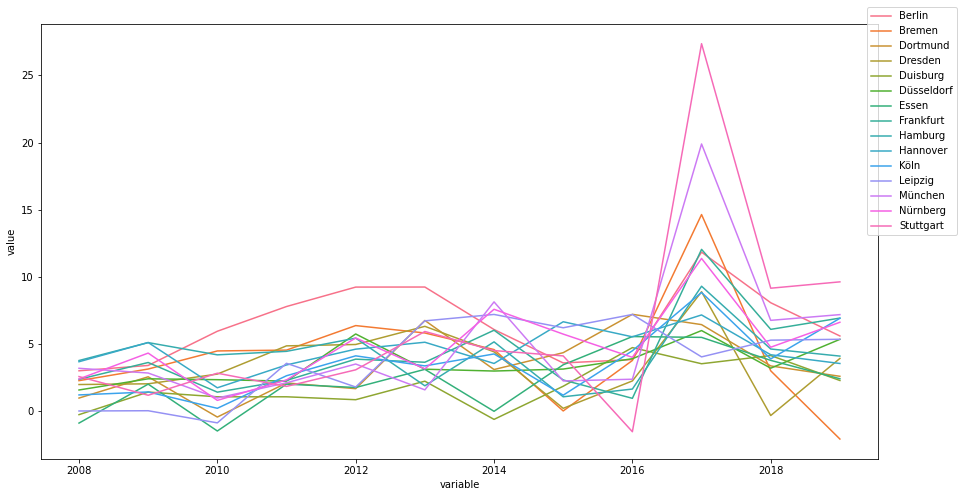

In [184]:
plt.figure(figsize=(15,8))
sns.lineplot(data=pd.melt(changes_per_year.reset_index(), id_vars='City'), x='variable', y='value', hue='City')
plt.legend(bbox_to_anchor=(1.1, 1.05))

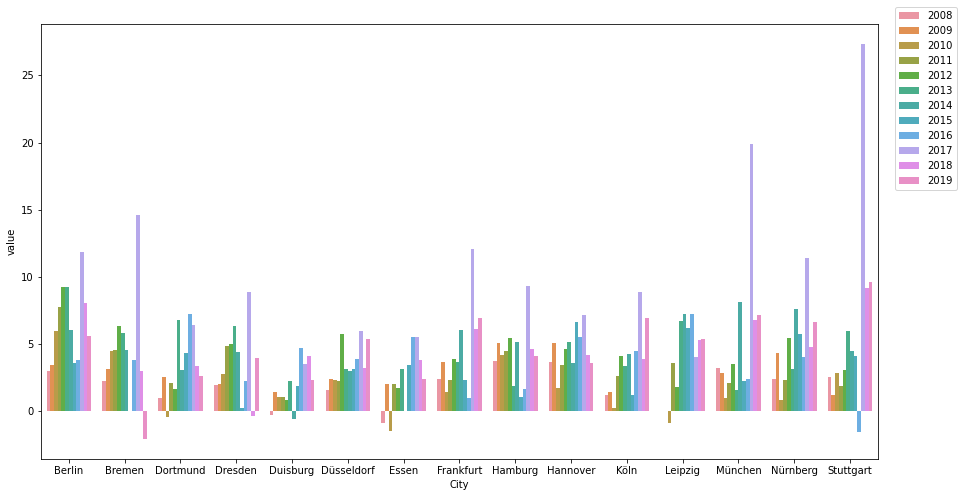

In [186]:
plt.figure(figsize=(15,8))
sns.barplot(data=pd.melt(changes_per_year.reset_index(), id_vars='City'), x='City', y='value', hue='variable')
plt.legend(bbox_to_anchor=(1.1, 1.05))



In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651885 entries, 0 to 2651884
Data columns (total 79 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   obid                              int64         
 1   mietekalt                         float64       
 2   nebenkosten                       float64       
 3   heizkosten                        float64       
 4   baujahr                           float64       
 5   letzte_modernisierung             float64       
 6   wohnflaeche                       float64       
 7   nutzflaeche                       float64       
 8   etage                             float64       
 9   anzahletagen                      float64       
 10  zimmeranzahl                      float64       
 11  schlafzimmer                      float64       
 12  badezimmer                        float64       
 13  ev_kennwert                       float64       
 14  laufzeittage      

In [276]:
df.kategorie_Wohnung.value_counts()

Etagenwohnung          1342584
Dachgeschosswohnung     258849
Penthouse                73689
Hochparterre             54937
Terassenwohnung          42749
11                       36994
Souterrain               15480
Sonstiges                11332
Maisonette                8540
Name: kategorie_Wohnung, dtype: int64

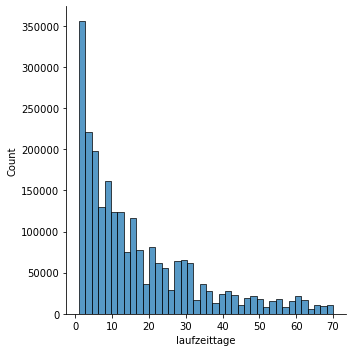

In [193]:
sns.displot(data=f.remove_outlier(df, columns=['laufzeittage']), x='laufzeittage', bins=40)

In [197]:
laufzeit = df.groupby(['City', 'year']).laufzeittage.mean().reset_index(name='mean_laufzeit')

In [198]:
laufzeit

,City,year,mean_laufzeit
0,Berlin,2007,33.933755
1,Berlin,2008,35.808885
2,Berlin,2009,33.381811
3,Berlin,2010,30.287826
4,Berlin,2011,26.019741
...,...,...,...
190,Stuttgart,2015,18.038562
191,Stuttgart,2016,15.957087
192,Stuttgart,2017,23.151567
193,Stuttgart,2018,15.786925


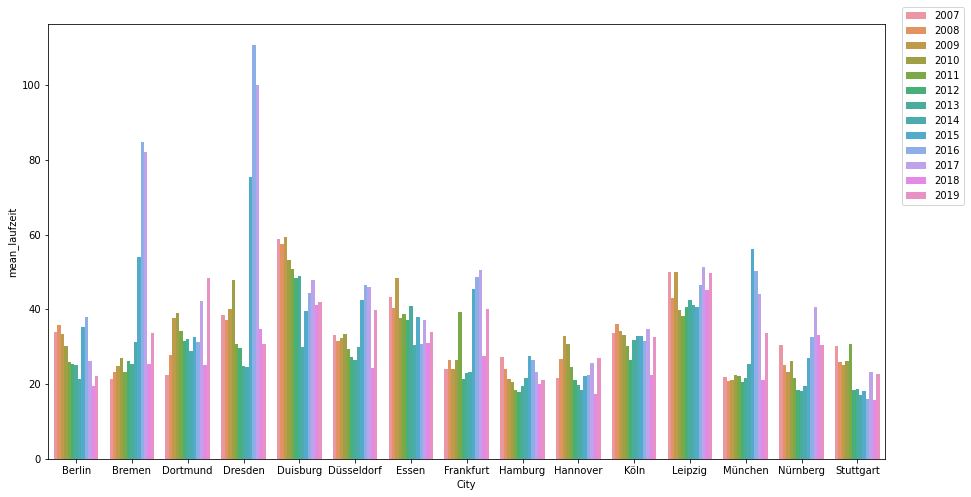

In [203]:
plt.figure(figsize=(15,8))
sns.barplot(data=laufzeit, x='City', y='mean_laufzeit', hue='year')
plt.legend(bbox_to_anchor=(1.1, 1.05))




In [242]:
changes_per_year_melt = pd.melt(changes_per_year.reset_index(), id_vars=['City'])
laufzeit_melt = pd.melt(laufzeit.reset_index(), id_vars=['City'])

In [261]:
changes_per_year_melt

,City,variable,value
0,Berlin,2008,3.024677
1,Bremen,2008,2.291093
2,Dortmund,2008,0.995874
3,Dresden,2008,2.002802
4,Duisburg,2008,-0.238034
...,...,...,...
175,Köln,2019,6.929729
176,Leipzig,2019,5.368929
177,München,2019,7.203931
178,Nürnberg,2019,6.634448


In [264]:
laufzeit_from_08

,City,year,mean_laufzeit
1,Berlin,2008,35.808885
2,Berlin,2009,33.381811
3,Berlin,2010,30.287826
4,Berlin,2011,26.019741
5,Berlin,2012,25.425283
...,...,...,...
190,Stuttgart,2015,18.038562
191,Stuttgart,2016,15.957087
192,Stuttgart,2017,23.151567
193,Stuttgart,2018,15.786925


In [256]:
idx = laufzeit[laufzeit.year==2007].index
laufzeit_from_08 = laufzeit.drop(index=idx)

In [268]:
new_df = changes_per_year_melt.merge(laufzeit_from_08, left_on=['City', 'variable'], right_on=['City', 'year'])

In [269]:
new_df

,City,variable,value,year,mean_laufzeit
0,Berlin,2008,3.024677,2008,35.808885
1,Bremen,2008,2.291093,2008,23.328386
2,Dortmund,2008,0.995874,2008,27.834407
3,Dresden,2008,2.002802,2008,37.169737
4,Duisburg,2008,-0.238034,2008,57.608513
...,...,...,...,...,...
175,Köln,2019,6.929729,2019,32.693742
176,Leipzig,2019,5.368929,2019,49.784021
177,München,2019,7.203931,2019,33.601067
178,Nürnberg,2019,6.634448,2019,30.361071


<AxesSubplot:xlabel='value', ylabel='mean_laufzeit'>

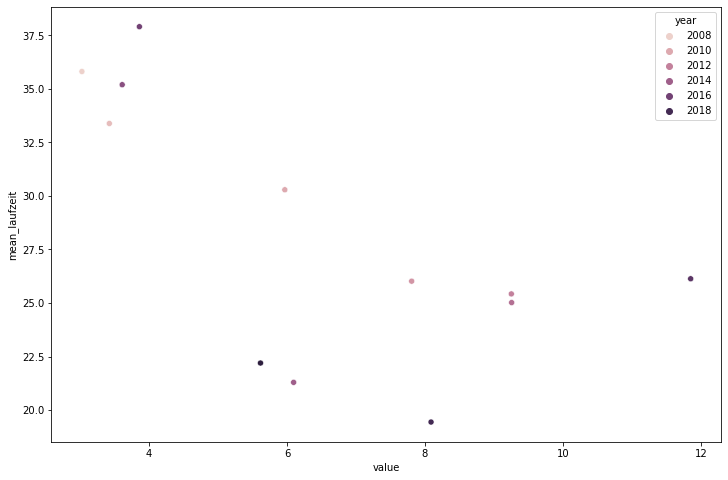

In [274]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=new_df.query('City == "Berlin"'), x='value', y='mean_laufzeit', hue='year' )

In [233]:
changes_per_year

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
City,,,,,,,,,,,,
Berlin,3.024677,3.422101,5.966812,7.805834,9.251936,9.255940,6.094571,3.608673,3.858232,11.851779,8.087292,5.614077
Bremen,2.291093,3.155958,4.501506,4.564193,6.387587,5.837287,4.604441,0.037480,3.791234,14.647445,3.022464,-2.051893
Dortmund,0.995874,2.577964,-0.416833,2.120857,1.694499,6.769108,3.117637,4.371844,7.225761,6.459863,3.386871,2.614509
Dresden,2.002802,2.056830,2.780258,4.879332,4.981577,6.332063,4.436114,0.232158,2.269862,8.904845,-0.302179,3.943329
Duisburg,-0.238034,1.441919,1.090094,1.090476,0.873612,2.251710,-0.590049,1.875631,4.749831,3.548873,4.159418,2.302582
Düsseldorf,1.596373,2.428656,2.363024,2.256655,5.764646,3.142972,3.005960,3.153587,3.922815,6.017420,3.218902,5.364336
Essen,-0.866014,2.032118,-1.454337,2.030965,1.781055,3.132570,0.010582,3.472211,5.571676,5.510446,3.799130,2.433919
Frankfurt,2.388398,3.641868,1.435785,2.308282,3.890964,3.660025,6.041859,2.341152,0.976682,12.058071,6.106979,6.945128
Hamburg,3.788490,5.122237,4.211548,4.471672,5.453496,1.907542,5.176534,1.090158,1.666180,9.315270,4.645379,4.118010
